In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
file_path = "E:\DATA ANALYST\Pandas\Tesla Stock Analysis\TESLA.csv"
data = pd.read_csv(file_path)
data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...,...
3632,3632,12/3/2024,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,12/4/2024,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,12/5/2024,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,12/6/2024,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


In [28]:
cleaned_data = data.drop(columns=["Unnamed: 0"])
cleaned_data["Date"] = pd.to_datetime(cleaned_data["Date"])
cleaned_data = cleaned_data.sort_values("Date")

In [32]:
print(cleaned_data.head())

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [39]:
# Descriptive Statistics

descriptive_stats = cleaned_data.describe()
print(descriptive_stats)

                                Date         Open         High          Low  \
count                           3637  3637.000000  3637.000000  3637.000000   
mean   2017-09-17 12:05:20.703876864    80.080574    81.832710    78.219276   
min              2010-06-29 00:00:00     1.076000     1.108667     0.998667   
25%              2014-02-07 00:00:00    12.046667    12.320000    11.746667   
50%              2017-09-18 00:00:00    17.833332    18.080000    17.563999   
75%              2021-04-29 00:00:00   176.070007   179.770004   173.169998   
max              2024-12-09 00:00:00   411.470001   414.496674   405.666656   
std                              NaN   105.466131   107.807170   102.931208   

             Close    Adj Close        Volume  
count  3637.000000  3637.000000  3.637000e+03  
mean     80.067952    80.067952  9.667330e+07  
min       1.053333     1.053333  1.777500e+06  
25%      12.065333    12.065333  4.868250e+07  
50%      17.846666    17.846666  8.198100e+07  


# Stock's Closing Price Over Time

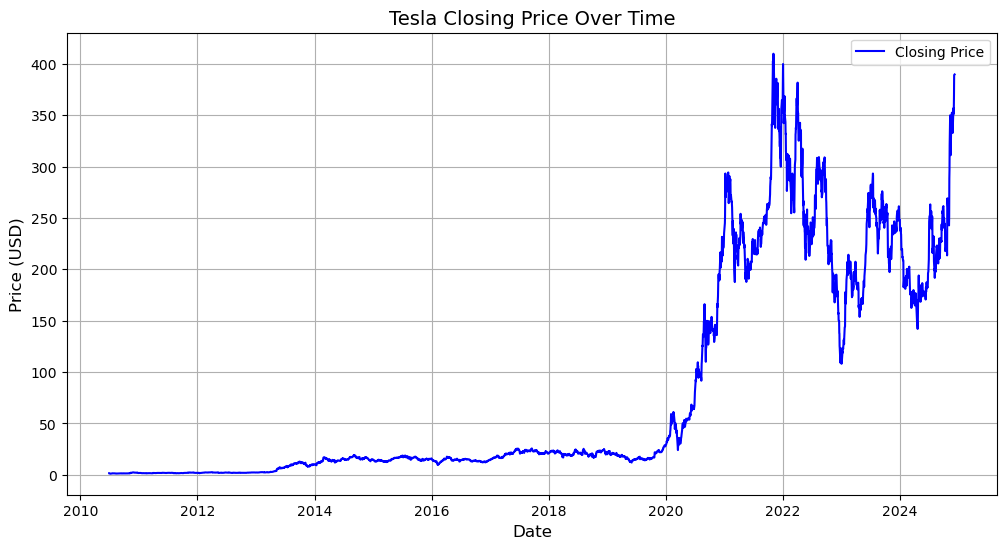

In [44]:
plt.figure(figsize=(12,6))
plt.plot(cleaned_data["Date"],cleaned_data["Close"], label= "Closing Price", color="blue")
plt.title("Tesla Closing Price Over Time",fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Tesla Trading Volume Over Time

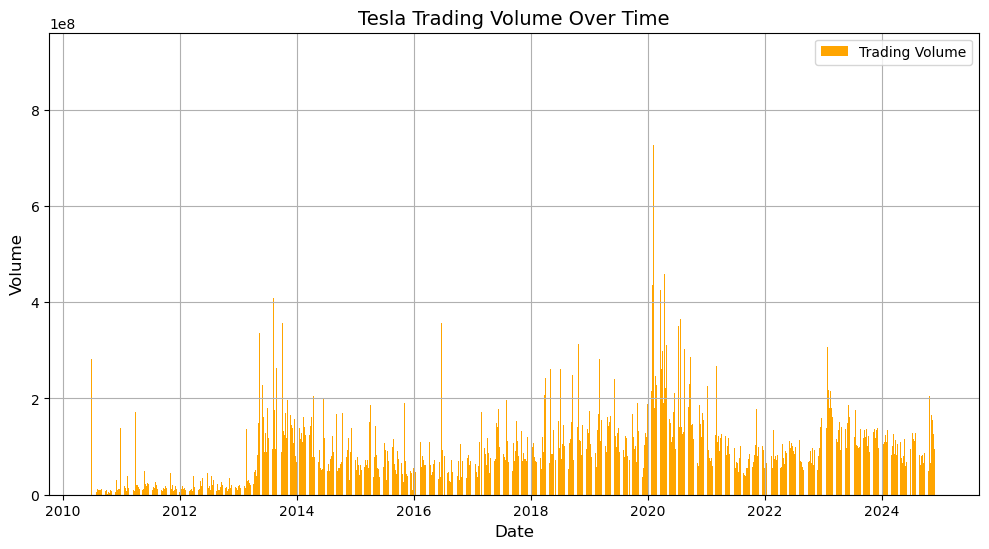

In [51]:
plt.figure(figsize=(12,6))
plt.bar(cleaned_data["Date"],cleaned_data["Volume"],color = "orange",label = "Trading Volume", width=1)
plt.title("Tesla Trading Volume Over Time", fontsize=14)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Volume",fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Daily Returns

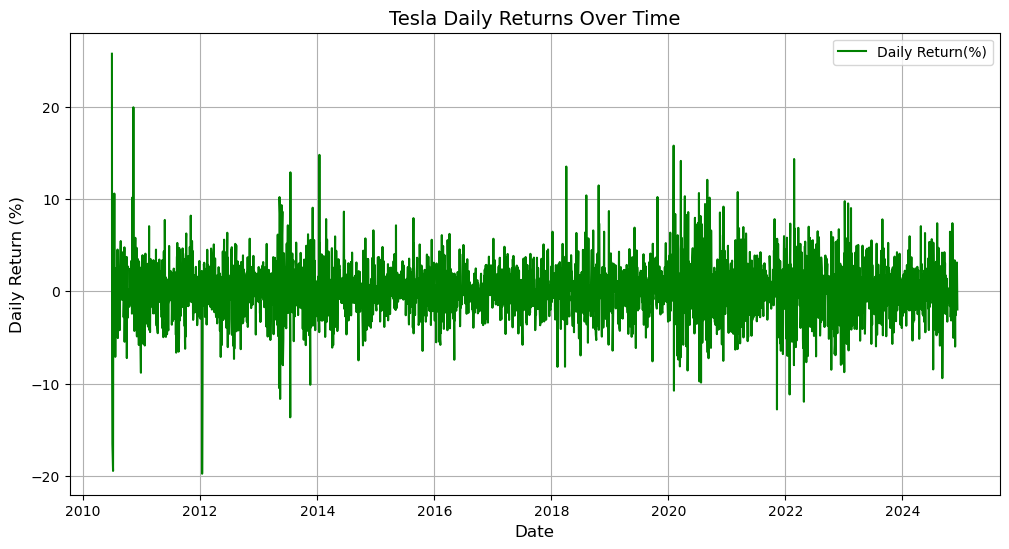

In [56]:
cleaned_data["Daily Return(%)"] = ((cleaned_data["Close"] - cleaned_data["Open"]) / cleaned_data["Open"]) * 100

plt.figure(figsize = (12,6))
plt.plot(cleaned_data["Date"],cleaned_data["Daily Return(%)"], label = "Daily Return(%)", color = "green")
plt.title("Tesla Daily Returns Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Return (%)", fontsize=12)
plt.legend()
plt.grid()
plt.show()


# 7-Day and 30-Day Moving Averages

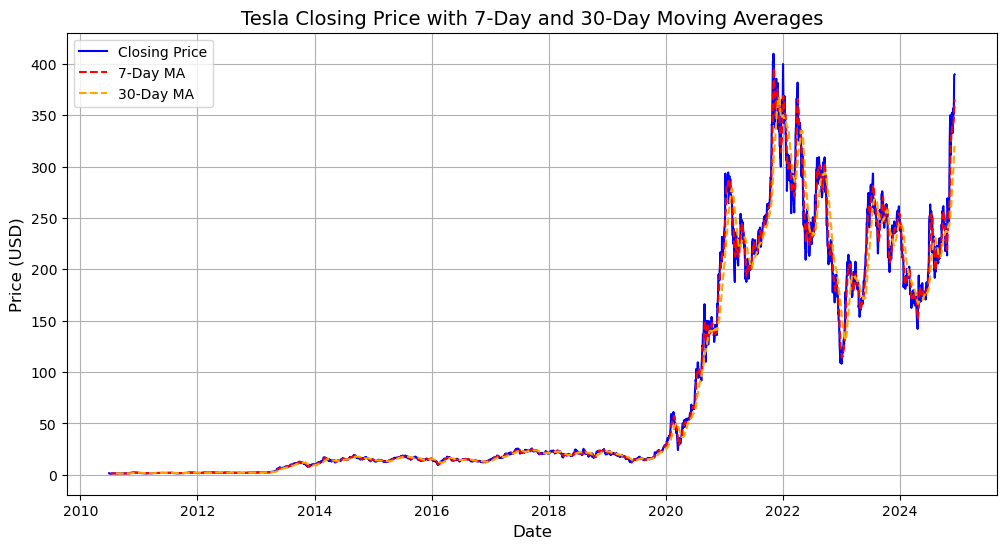

In [59]:

cleaned_data["7-Day MA"] = cleaned_data["Close"].rolling(window=7).mean()
cleaned_data["30-Day MA"] = cleaned_data["Close"].rolling(window=30).mean()


plt.figure(figsize=(12, 6))
plt.plot(cleaned_data["Date"], cleaned_data["Close"], label="Closing Price", color="blue")
plt.plot(cleaned_data["Date"], cleaned_data["7-Day MA"], label="7-Day MA", color="red", linestyle="--")
plt.plot(cleaned_data["Date"], cleaned_data["30-Day MA"], label="30-Day MA", color="orange", linestyle="--")
plt.title("Tesla Closing Price with 7-Day and 30-Day Moving Averages", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.grid()
plt.show()


# Volume vs. Closing Price Scatter Plot

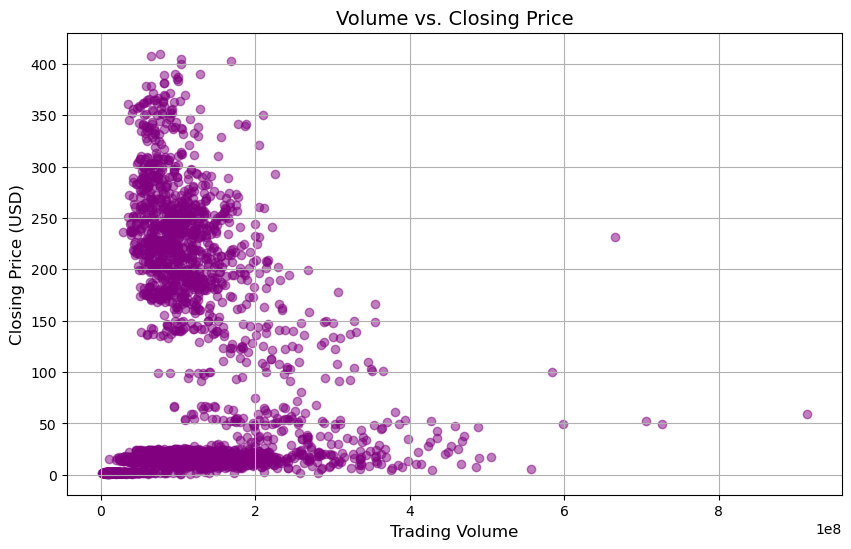

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data["Volume"], cleaned_data["Close"], alpha=0.5, color="purple")
plt.title("Volume vs. Closing Price", fontsize=14)
plt.xlabel("Trading Volume", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.grid()
plt.show()